<a href="https://colab.research.google.com/github/IlyaKo4atkov/My-machine-learning-projects/blob/main/Handwritten_letters_(EN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Условие задачи

## Используя датасет по рукописным буквам английского языка, обучить модель, оценить ее предсказательные способности. Использовать только полносвязанные слои. Поэкспериментировать с числом слоев и числом нейронов в слое, добиться максимальной точности. Нарисовать графики точности и потерь для обучающей выборки.

# Загрузка необходимых библиотек

In [ ]:
!pip install Keras

# Импорт необходимых библиотек

In [ ]:
#Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
%matplotlib inline

dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

X = dataset[:,1:785]
Y = dataset[:,0]

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Создание модели нейронной сети

In [ ]:
#Создание модели
model = Sequential()
#Добавление слоев
model.add(Dense(100, input_shape=(784,), activation='relu'))
model.add(Dense(76, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(26, activation='softmax'))

#Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 26) # значение 26 было подобрано в процессе корректировки данных и правильной соразмерности. При других значениях модель не компилировалась
y_test = to_categorical(y_test, 26)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary() #Промежуточный этап проверки каждого заданного слоя

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 76)                  │           7,676 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │           4,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           1,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,942 (718.53 KB)

 Trainable params: 91,970 (359.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,972 (359.27 KB)

In [ ]:
#Компиляция модели
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

#Обучение модели
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8496 - loss: 0.5442 - val_accuracy: 0.9464 - val_loss: 0.1907
Epoch 2/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9603 - loss: 0.1411 - val_accuracy: 0.9660 - val_loss: 0.1252
Epoch 3/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9695 - loss: 0.1089 - val_accuracy: 0.9688 - val_loss: 0.1165
Epoch 4/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9745 - loss: 0.0919 - val_accuracy: 0.9716 - val_loss: 0.1075
Epoch 5/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9768 - loss: 0.0864 - val_accuracy: 0.9708 - val_loss: 0.1142


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовой выборке равна: {test_acc}')
print(f'Потери на тестовой выборке равна: {test_loss}')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9699 - loss: 0.1193
Точность на тестовой выборке равна: 0.9708421230316162
Потери на тестовой выборке равна: 0.1141996681690216


# Результат обучения модели в виде графиков

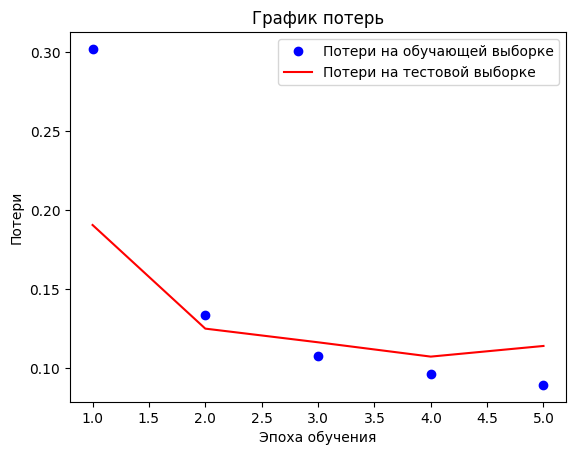

In [ ]:

#Построение графика потерь
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'r', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

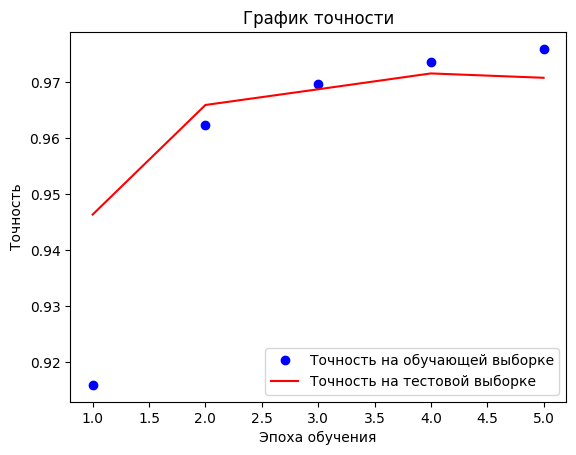

In [ ]:
#Построение графика точности
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'r', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

## В ходе создания модели удалось достичь оптимальной архитектуры модели, которая даже на 5-ти эпохах показала результат в >95%. По графику можно отметить что переобучение не наступило, поэтому можно поэкспериментировать с увеличение количества эпох.